# Import Libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

# MNIST Data Download and Processing

In [167]:
from tensorflow.keras.datasets import mnist

In [168]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [169]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


# Filtering the Data (0,1,4)

In [170]:
# train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 2) | (Y_train == 3) | (Y_train == 4))
# test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 2) | (Y_test == 3) | (Y_test == 4))
train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 4))
test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 4))

In [171]:
X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]

In [172]:
# # Create a TensorFlow dataset
# datasetTrain = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
# datasetTest = tf.data.Dataset.from_tensor_slices((X_test,Y_test))

# # Define a function to resize the images
# def resize_image(image, target_size=(10, 10)):
#     resized_image = tf.image.resize(image, target_size)
#     return resized_image

# # Map the resize_image function to the dataset
# target_size = [20, 20]
# resized_datasetTrain = datasetTrain.map(lambda x, y: (resize_image(tf.expand_dims(x, axis=-1), target_size), y))
# resized_datasetTest = datasetTest.map(lambda x, y: (resize_image(tf.expand_dims(x,axis = -1),target_size),y))
# # (Optional) Normalize the pixel values
# resized_datasetTrain = resized_datasetTrain.map(lambda x, y: (x / 255.0, y))
# resized_datasetTest = resized_datasetTest.map(lambda x, y: (x / 255.0,y))

# # Iterate through the resized dataset
# for image, label in resized_datasetTrain.take(1):# Take the first 5 samples as an example
#     print("Resized Image Shape:", image.shape)
#     print("Label:", label.numpy())
#     plt.imshow(image)
#     plt.show()

# for image, label in resized_datasetTest.take(1):# Take the first 5 samples as an example
#     print("Resized Image Shape:", image.shape)
#     print("Label:", label.numpy())
#     plt.imshow(image)
#     plt.show()

# Creating dataset of reduce dimensions


In [173]:
# def createDatasetWithReducedDimension():
#     X_train = [] 
#     Y_train = []
    
#     X_test = []
#     Y_test = []
    
#     for image , label in resized_datasetTrain:
#         X_train.append(image)
#         Y_train.append(label)
    
#     for image,label in resized_datasetTest:
#         X_test.append(image)
#         Y_test.append(label)
    
#     return X_train , Y_train , X_test , Y_test

# X_train , Y_train , X_test , Y_test = createDatasetWithReducedDimension()
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)

# X_test = np.array(X_test)
# Y_test = np.array(Y_test)

In [174]:
# dataset_test = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

# # Define a function to resize the images
# def resize_image(image, target_size=(10, 10)):
#     resized_image = tf.image.resize(image, target_size)
#     return resized_image

# # Map the resize_image function to the dataset
# target_size = [10, 10]
# resized_dataset_test = dataset_test.map(lambda x, y: (resize_image(tf.expand_dims(x, axis=-1), target_size), y))

# # (Optional) Normalize the pixel values
# # resized_dataset = resized_dataset.map(lambda x, y: (x / 255.0, y))

# # Iterate through the resized dataset
# for image, label in resized_dataset.take(1):# Take the first 5 samples as an example
#     print("Resized Image Shape:", image.shape)
#     print("Label:", label.numpy())
#     plt.imshow(image)

In [175]:
# X_train = []
# Y_train = []
# for image , label in resized_dataset:
#     X_train.append(image)
#     Y_train.append(label.numpy())

# X_train = np.stack(X_train,axis = 0)
# Y_train = np.stack(Y_train,axis = 0)

In [176]:
# X_test = []
# Y_test = []
# for image , label in resized_dataset:
#     X_test.append(image)
#     Y_test.append(label.numpy())

# X_test = np.stack(X_test,axis = 0)
# Y_test = np.stack(Y_test,axis = 0)

# Show Random Images

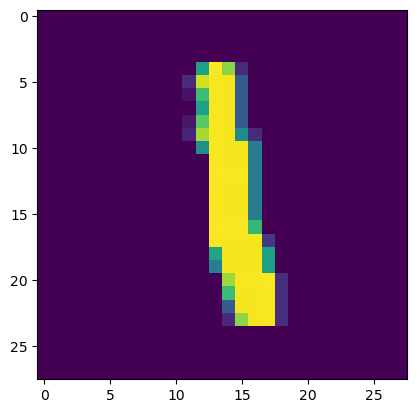

In [177]:
plt.imshow(X_train[3])

(28, 28)

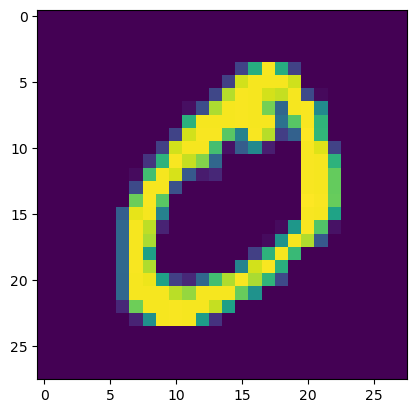

In [178]:
plt.imshow(X_train[0])
X_train[0].shape

# MNIST Data Information

In [179]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (18507, 28, 28)
Y_train: (18507,)
X_test:  (3097, 28, 28)
Y_test:  (3097,)


In [180]:
from sklearn.model_selection import train_test_split

X_train, _,Y_train, _ = train_test_split(
    X_train, Y_train, train_size=500, stratify=Y_train, random_state=42
)

# Normalize the Images

In [181]:
X_train = X_train/255.0
X_test = X_test/255.0

In [182]:
len(X_train)

500

In [183]:
X_train[1].shape

(28, 28)

# Flattening the Input

In [184]:
def flattenInput(mat):
        mat = mat.flatten()
        mat = mat.reshape(mat.shape[0],1)
        return mat

# Weight Initialization(Random,Normalized)

In [185]:
def weightInitialization(rows , cols, type = "random"):
    if(type == "random"):
        initialWeights = np.random.random(size = (rows,cols))
    else:
        initialWeights = np.random.normal(size = (rows,cols))
    
    initialWeights = initialWeights.reshape(rows,cols)
    return initialWeights

In [186]:
#weights = weightInitialization(784,20,"random")
# weights1stLayer = weightInitialization(784,10,"normalize")
# weights2ndLayer = weightInitialization(10,1,"normalize")

In [187]:
#weights.shape

# Manipulating the Array

In [188]:
def manipulatingTheArray(mat):
    #mat = flattenInput(mat)
    
    for index in range(mat.shape[0]):    
        if mat[index] < 0.2:
            mat[index] = -1
    return mat

# Thresholding Weight

* function   : Thesholding 
* prameters  : matrix
* return     : updated matrix
* Description : check if the value in the matrix is above or below certain thresholds.
                (e.g for the below function- if greater than 0.8 , values should remain same
                                             if between 0.5 and 0.8 , value equals 0.5
                                             if between 0.1 and 0.5 , value equals 0.3
                                             else value equals 0.1)
* 4.Points to remember : The thresholding values are hard coded. To make the code more suitable for different values ,   we can change the function parameters and pass thresholding values as well to the funtion.|

In [189]:
def Thresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.8:
            out[0][item] = 0.8
        elif out[0][item] >= 0.5 and out[0][item] < 0.8:
            out[0][item] = 0.5
        elif out[0][item] > 0.1 and out[0][item] < 0.5:
            out[0][item] = 0.3
        else:
            out[0][item] = 0.1
    return out

# Activation Value Thresholding

* This is similiar to the above funtion (thresholding function)
* Parameters  : Matrix
* Description : same as the Thresholding function. (Thresholding values are different).

In [190]:
def ActThresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.9:
            out[0][item] = 0.9
#         else:
#             out[0][item] = 0.1
    return out

# Threshold Check

* function    : crossThreshold
* parameters  : matrix
* return      : matrix
* Description : checks if the value in the matrix is greater than a certain threshold , set the value as 0 if not then do the leaking

In [191]:
def crossThreshold(out,leakingVal):
   
    for item in range(out.shape[1]):
        if out[0][item] >= 0.9:
            out[0][item] = 0.9
        elif out[0][item] < 0.9 and out[0][item] >= 0.5:
            out[0][item] = out[0][item] - leakingVal
        elif out[0][item] <= 0.5 and out[0][item] < 0.3:
            out[0][item] = out[0][item] - leakingVal
        else:
            out[0][item] = 0.1
#         else:
#             out[0][item] = out[0][item] - leakingVal

    return out

# Weight Threshold (Future Reference)
* function    : weightThreshold
* parameters  : matrix
* return      : matrix
* Description : if the values in the matrix are less 0 , set it at 0

In [192]:
def weightThreshold(weight):
    for item in range(weight.shape[1]):
        if weight[0][item] <= 0:
            weight[0][item] = 0
    
    return weight
            

In [193]:
def weightThresholdAfterTraining(weight):
    for x in range(weight.shape[0]):
        for y in range(weight.shape[1]):
            if weight[x][y] <= 0:
                weight[x][y] = 0
    
    return weight

# Print Results
* function : printResults
* parameters : input Image matrix , weight Matrix (final)
* return : result
* Description : It does matrix dot product of the flattened image and the final weight matrix

In [194]:
def printResults(inputImage,finalWeight):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        result.append(np.dot(item.T,finalWeight.T))
    return result

In [195]:
def printResultsOut(inputImage,weight):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        reverseinput_ = item[::-1]
        sumInput_= reverseinput_ + item
        out1 = np.dot(item.T , weight[0])
        out2 = np.dot(reverseinput_.T,weight[1])
        out3 = np.dot(sumInput_.T,weight[2])
        #item = manipulatingTheArray(item)
        result.append([out1,out2,out3])
    return result

In [196]:
def printResultsWithExtraLayer(inputImage, weight1,weight2):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        out1 = np.dot(item.T,weight1)
        out2 = np.dot(out1,weight2)
        result.append(out2)
    return result

In [283]:
def printResultForElementWise(inputImage,finalWeight):
    result = []
    finalWeight = finalWeight.reshape(784,1)
    for item in inputImage:
        item = flattenInput(item)
        #item = item.flatten()
        #item = manipulatingTheArray(item)
        #result_ = finalWeight * item
#         print(item.shape)
#         print(finalWeight.shape)
        result_ = np.dot(item.T,finalWeight)
        result.append(result_)
    return result

# Flattens the test Image

In [232]:
testFlatten = []

for image_ in X_test:
        image_ = flattenInput(image_)
        testFlatten.append(image_)

# Find Patterns in the output

In [233]:
# Notes
# Print the values of out and set the threshold values accordingly
# Check with different values manipulating Array, weightthreshold,crossthreshold

# get the values of out , remove all the code , see the values , 
# Try normalizing if possible, or see how to limit the output, no weight update , just do matrix multiplication
#set the weight equals 1,-1 and get the output values , understand the pattern , get the max and min value,
# and try to see the thresholds.

In [234]:
image = flattenInput(X_train[0])
image

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [235]:
def findout(inputImage,weight1):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    alpha = 0.01
    flattenImage = [] # empty list
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    
    outEpoch = []
    for input_ in flattenImage:
        #rint(input_.shape)
        reverseinput_ = input_[::-1]
        sumInput_= reverseinput_ + input_
        out1 = alpha * np.dot(input_.T , weight1[:,0])
        out2 = alpha * np.dot(reverseinput_.T,weight1[:,1])
        out3 = alpha * np.dot(sumInput_.T,weight1[:,2])
        out = np.array([out1,out2,out3])
        outEpoch.append(out)
    return outEpoch

In [236]:
weights1stLayer = weightInitialization(784,3,"random")
out = findout(X_train,weights1stLayer)

In [237]:
out

[array([[0.69641183],
        [0.66914956],
        [1.21231137]]),
 array([[0.43625623],
        [0.41032713],
        [0.89438424]]),
 array([[0.30514839],
        [0.27213371],
        [0.61632973]]),
 array([[0.29437987],
        [0.27668894],
        [0.58506391]]),
 array([[0.48037314],
        [0.42494907],
        [0.84692207]]),
 array([[0.41816265],
        [0.36678491],
        [0.68873429]]),
 array([[0.22785339],
        [0.21745818],
        [0.45817912]]),
 array([[0.5464847 ],
        [0.5140166 ],
        [0.86547885]]),
 array([[0.61306424],
        [0.57805668],
        [1.08139131]]),
 array([[0.50489433],
        [0.47894754],
        [0.9049297 ]]),
 array([[0.24979657],
        [0.20916908],
        [0.47574604]]),
 array([[0.40460954],
        [0.3715131 ],
        [0.76473219]]),
 array([[0.22083216],
        [0.20886873],
        [0.47012346]]),
 array([[0.21439326],
        [0.20901564],
        [0.43566345]]),
 array([[0.8773879 ],
        [0.78874228],
    

In [238]:
outIndex0 = []
outIndex1 = []
outIndex2 = []
for values in out:
    outIndex0.append(values[0])
    outIndex1.append(values[1])
    outIndex2.append(values[2])

In [239]:
weight = np.random.rand(784)

In [240]:
weight

array([9.37346789e-01, 6.73668832e-01, 5.98139294e-01, 1.00259676e-01,
       6.82405719e-01, 3.92754171e-01, 3.43146485e-01, 1.86440434e-01,
       9.63864623e-01, 9.73321570e-01, 4.59788511e-01, 5.76917263e-01,
       5.18852123e-03, 9.12624664e-01, 2.39133087e-01, 7.51366410e-01,
       3.23665677e-01, 9.06136999e-01, 7.15526227e-01, 9.77379999e-02,
       4.43297116e-01, 4.53244659e-01, 9.41903417e-01, 9.06800599e-01,
       3.77963397e-03, 2.85372399e-01, 8.84661225e-01, 6.26633625e-01,
       8.78732685e-01, 1.77179947e-01, 2.31608224e-01, 1.47398404e-01,
       9.57125662e-01, 1.47104783e-01, 8.97226699e-01, 2.91720133e-01,
       8.20109296e-01, 4.61246713e-01, 9.43222948e-01, 4.79655894e-01,
       8.29537972e-01, 8.26524178e-02, 4.27309505e-02, 7.50834096e-01,
       7.16840696e-01, 1.84812914e-01, 1.06608316e-01, 2.43359979e-01,
       6.06933790e-01, 6.38399832e-01, 7.46754516e-01, 6.89493052e-01,
       7.61828641e-01, 3.70162486e-01, 5.53704559e-01, 9.11103601e-01,
      

In [274]:
def weightUpdateElementWise(epochs,X_train,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    alpha = 0.01
    flattenImage = [] # empty list
    for image_ in X_train:
        image_ = flattenInput(image_)
        image_ = image_.flatten()
        flattenImage.append(image_)
    
    outEpoch = []
    alpha = 0.05
    for epoch in range(epochs):
        for input_ in flattenImage:
            out = np.multiply(input_,weight)
        
            #Normalize
            mean = np.mean(out)
            std_dev = np.std(out)
            out = (out - mean) / std_dev
        
            # Weight Update
            for index in range(len(out)):
                if out[index] > input_[index]:
                    weight[index] = weight[index] + alpha * input_[index]
                else:
                    weight[index] = weight[index] - alpha * input_[index]
                    
                if weight[index] < 0:
                    weight[index] = 0
    return weight

In [275]:
weight = weightUpdateElementWise(10,X_train,weight)
#Break the input into different blocks and create weight matrix for that (one weight column)
# 2. Do the dot product and change the weight for that block according to the pixel value and see
# w =w - alpha * intensity value

In [276]:
X_train[3].shape

(28, 28)

In [284]:
out = printResultForElementWise(X_train,weight)

In [285]:
# Threshold the weight which are increasing

[array([[22264.70451031]]),
 array([[18698.74922576]]),
 array([[13287.46179285]]),
 array([[9366.47886238]]),
 array([[16049.69687145]]),
 array([[11890.6803876]]),
 array([[10690.41840272]]),
 array([[12827.35992463]]),
 array([[17889.35617035]]),
 array([[17532.05583419]]),
 array([[9904.98769425]]),
 array([[14926.29018147]]),
 array([[10079.78245366]]),
 array([[8888.98108934]]),
 array([[22347.89976534]]),
 array([[17298.25645695]]),
 array([[20049.98495054]]),
 array([[10838.80916379]]),
 array([[14014.26842041]]),
 array([[11582.54361938]]),
 array([[13958.85944948]]),
 array([[16203.95558256]]),
 array([[19704.80874448]]),
 array([[9016.31934809]]),
 array([[22260.59503184]]),
 array([[12109.17333516]]),
 array([[24244.21421995]]),
 array([[12317.7705653]]),
 array([[9792.55872677]]),
 array([[14255.58648117]]),
 array([[27694.38327585]]),
 array([[17510.37738174]]),
 array([[14184.60312388]]),
 array([[18411.54380121]]),
 array([[28182.77639905]]),
 array([[13004.50338458]]),

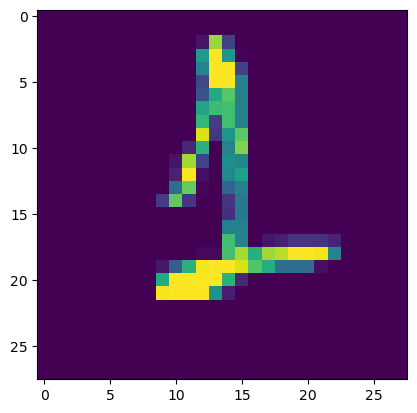

In [278]:
plt.imshow(X_train[3])

In [271]:
x=out[3].reshape(28,28)

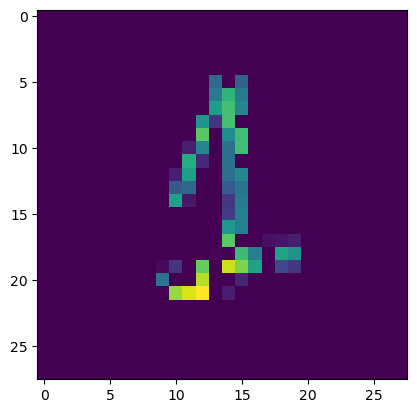

In [272]:
plt.imshow(x)

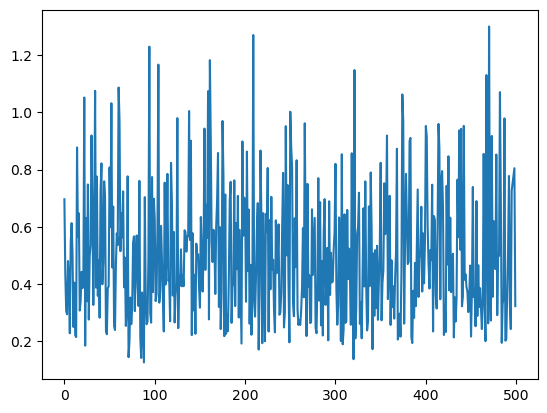

In [258]:
plt.plot(outIndex0)

In [228]:
out[1]

0.0

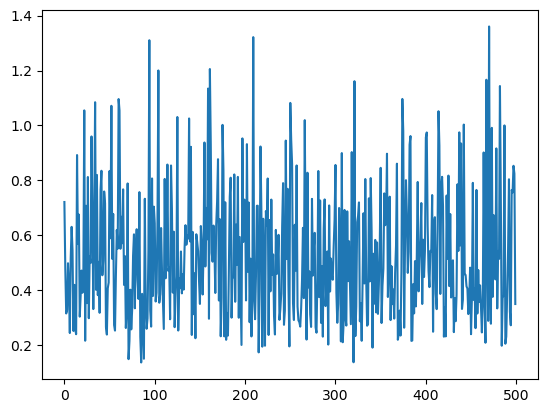

In [263]:
plt.plot(outIndex1)

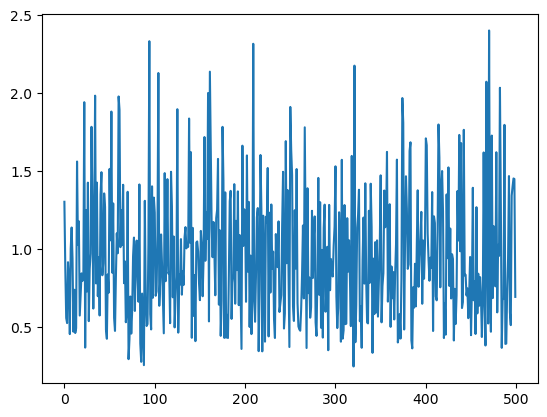

In [264]:
plt.plot(outIndex2)

In [364]:
def weightUpateContainingMemoryElement(epoch,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = [] # empty list
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    out1 = np.array(0)
    out2 = np.array(0)
    out3 = np.array(0)
    alpha =1e-2
    beta = 1e-3
    thresholdVal = 0.9
    leakingVal = 0.1
    
    outEpoch = []
    for epoch_ in range(epoch):
        print(epoch_)
        for input_ in flattenImage:
                
                reverseinput_ = input_[::-1]
                sumInput_= reverseinput_ + input_
                out1 = alpha * np.dot(input_.T , weight[:,0]) + out1
                out2 = alpha * np.dot(reverseinput_.T,weight[:,1]) + out2 + beta * out1
                out3 = alpha * np.dot(sumInput_.T,weight[:,2]) + out3 + beta * out2
                out = np.array([out1,out2,out3])
                print(out)
               
                inputM_0 = manipulatingTheArray(input_)
                inputM_1 = manipulatingTheArray(reverseinput_)
                inputM_2 = manipulatingTheArray(sumInput_)
#                 inputM_0 = input_
#                 inputM_1 = reverseinput_
#                 inputM_2 = sumInput_
                
                outEpoch.append(np.dot(inputM_0,out1))
                x = weight[:,0]
                weight[:,0] = weight[:,0] +  beta * np.dot(inputM_0,out1)
                weight[:,1] = weight[:,1] +  beta * np.dot(inputM_1,out2)
                weight[:,2] = weight[:,2] +  beta * np.dot(inputM_2,out3)
                
    weight = np.array([weight[:,0],weight[:,1],weight[:,2]])
    return weight,outEpoch

In [365]:
weights1stLayer = weightInitialization(784,3,"random")
weights1stLayer

array([[0.74804552, 0.52708569, 0.25661122],
       [0.2459611 , 0.6265059 , 0.27386724],
       [0.79596045, 0.44745149, 0.38267562],
       ...,
       [0.23832087, 0.00901723, 0.25969501],
       [0.61384714, 0.57482632, 0.12418893],
       [0.50987999, 0.62561207, 0.91556527]])

In [366]:
weight ,out= weightUpateContainingMemoryElement(1,X_train,weights1stLayer)

0
[[0.59292472]
 [0.61356748]
 [1.31228172]]
[[1.00392351]
 [1.04502276]
 [2.22799054]]
[[1.27725171]
 [1.32677097]
 [2.81152524]]
[[1.53188987]
 [1.61526818]
 [3.44232073]]
[[1.99587445]
 [2.04755628]
 [4.37636225]]
[[2.37794131]
 [2.40764163]
 [5.18620688]]
[[2.60407758]
 [2.64172901]
 [5.65971124]]
[[3.03600679]
 [3.13839461]
 [6.60040503]]
[[3.60392224]
 [3.73724289]
 [7.78597057]]
[[4.06062294]
 [4.19479352]
 [8.77469446]]
[[4.27279519]
 [4.43169179]
 [9.2380036 ]]
[[ 4.62626529]
 [ 4.78197853]
 [10.06532304]]
[[ 4.84808584]
 [ 5.00831485]
 [10.54186346]]
[[ 5.07000274]
 [ 5.22868043]
 [10.98276361]]
[[ 5.81017469]
 [ 6.00047857]
 [12.53607637]]
[[ 6.32067268]
 [ 6.51402549]
 [13.63034336]]
[[ 6.89552266]
 [ 7.12719395]
 [14.8852701 ]]
[[ 7.16442341]
 [ 7.3968929 ]
 [15.53456005]]
[[ 7.47236652]
 [ 7.76499231]
 [16.26531397]]
[[ 7.83531914]
 [ 8.16377485]
 [17.11532397]]
[[ 8.17427093]
 [ 8.49496089]
 [17.93412513]]
[[ 8.53846052]
 [ 8.88665906]
 [18.86825468]]
[[ 9.32958321]
 [ 9

[[ -13.39925703]
 [ -15.65569278]
 [1292.11215187]]
[[ -14.15958245]
 [ -16.53748173]
 [1319.69846499]]
[[ -14.23101646]
 [ -16.68037409]
 [1385.19173601]]
[[ -14.21160535]
 [ -16.65344941]
 [1409.87686061]]
[[ -14.49845266]
 [ -17.00116573]
 [1461.51102584]]
[[ -14.60166109]
 [ -17.13139495]
 [1489.79806694]]
[[ -14.53818938]
 [ -17.07082622]
 [1515.08345207]]
[[ -14.77816646]
 [ -17.35770885]
 [1566.83355438]]
[[ -14.98102241]
 [ -17.60874544]
 [1613.19173489]]
[[ -16.10195459]
 [ -18.80273351]
 [1615.81301723]]
[[ -16.05165143]
 [ -18.76143509]
 [1648.06685572]]
[[ -16.88558567]
 [ -19.66808901]
 [1635.22884881]]
[[ -16.83339063]
 [ -19.65269149]
 [1689.26009254]]
[[ -17.75165159]
 [ -20.66772433]
 [1683.38654259]]
[[ -17.94598352]
 [ -20.93625851]
 [1710.23456593]]
[[ -18.10408636]
 [ -21.07834527]
 [1757.96653778]]
[[ -18.09339417]
 [ -21.09454358]
 [1806.351557  ]]
[[ -18.03143593]
 [ -21.04574941]
 [1845.49639248]]
[[ -18.28426339]
 [ -21.34446413]
 [1890.47463142]]
[[ -18.71976

[[2.68029680e+01]
 [3.42927629e+01]
 [3.23135046e+04]]
[[2.70014925e+01]
 [3.45384646e+01]
 [3.30575622e+04]]
[[2.71788410e+01]
 [3.49002872e+01]
 [3.28160994e+04]]
[[2.72296968e+01]
 [3.49542299e+01]
 [3.38325515e+04]]
[[2.73086856e+01]
 [3.50353855e+01]
 [3.50107551e+04]]
[[2.73796999e+01]
 [3.51763514e+01]
 [3.37968510e+04]]
[[2.74527326e+01]
 [3.53165309e+01]
 [3.49750599e+04]]
[[2.76637150e+01]
 [3.55486702e+01]
 [3.56249168e+04]]
[[2.79293202e+01]
 [3.58712166e+01]
 [3.62307075e+04]]
[[2.80116047e+01]
 [3.59591290e+01]
 [3.74520983e+04]]
[[2.80798984e+01]
 [3.60429355e+01]
 [3.85993611e+04]]
[[2.81771077e+01]
 [3.61881909e+01]
 [3.88399638e+04]]
[[2.83262679e+01]
 [3.63236308e+01]
 [3.92682857e+04]]
[[2.83930543e+01]
 [3.64272332e+01]
 [3.99781262e+04]]
[[2.80729452e+01]
 [3.61309441e+01]
 [3.88484664e+04]]
[[2.82423802e+01]
 [3.62996731e+01]
 [3.93210741e+04]]
[[2.82748179e+01]
 [3.63691146e+01]
 [4.05658307e+04]]
[[2.82070590e+01]
 [3.62923641e+01]
 [4.11611582e+04]]
[[2.822402

In [368]:
weight

array([[-2.20994936e+00, -2.71203379e+00, -2.16203443e+00, ...,
        -2.71967401e+00, -2.34414774e+00, -2.44811489e+00],
       [-2.90956094e+00, -2.81014073e+00, -2.98919513e+00, ...,
        -3.42762940e+00, -2.86182030e+00, -2.81103456e+00],
       [-5.98265311e+03, -5.98263586e+03, -5.98252705e+03, ...,
        -5.98265003e+03, -5.98278553e+03, -5.98199416e+03]])

In [369]:
weight - weights1stLayer

ValueError: operands could not be broadcast together with shapes (3,784) (784,3) 

In [370]:
out = printResultsOut(X_train,weight)

In [371]:
outIndex0 = []
outIndex1 = []
outIndex2 = []
for values in out:
    outIndex0.append(values[0])
    outIndex1.append(values[1])
    outIndex2.append(values[2])

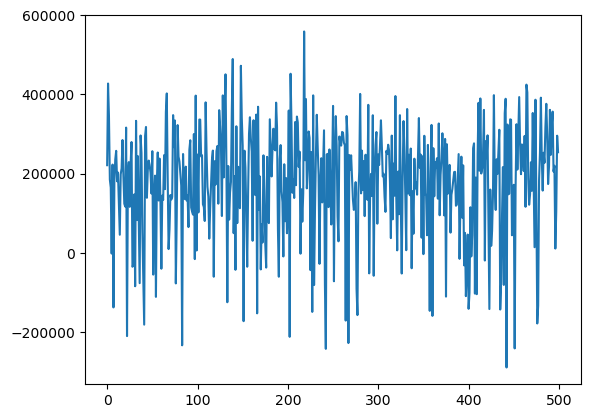

In [372]:
plt.plot(outIndex2)

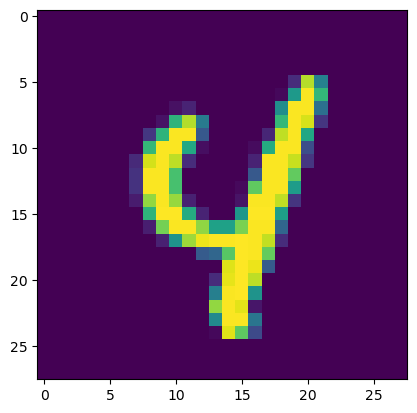

In [346]:
plt.imshow(X_train[4])

#### 

# Weight Update

In [223]:
def weightUpateContainingExtraLayer(epoch,iteration,inputImage,weight1,weight2):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = [] # empty list
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    out1 = np.zeros(10)
    out2 = np.zeros(1)
    alpha =1e-4
    beta = 1e-5
    thresholdVal = 0.7
    leakingVal = 0.1
    outArray = []
    for epoch_ in range(epoch):
        print(epoch_)
        outEpoch = []
        for input_ in flattenImage:
                out1 = alpha * np.dot(input_.T , weight1) + out1
#                 print(out1.shape)
#                 print(weight2.shape)
                outEpoch.append(out1)
                #out1 = crossThreshold(out1,leakingVal)
                out2 = alpha * np.dot(out1,weight2) + out2
                #out = ActThresholding(out)
                #outEpoch.append(out2)
                #out2 = crossThreshold(out2,thresholdVal,leakingVal)
                
                
                #inputM = manipulatingTheArray(input_)
                weight1 = weight1 + beta * np.dot(inputM,out1)
#                 print(out1.shape)
#                 print(out2.shape)
#                 break
                #out2 = ActThresholding(out2)
                weight2 = weight2 + beta * np.dot(out1.T,out2)
                
#                 weight1 = weightThreshold(weight1)
#                 weight2 = weightThreshold(weight2)
                #out = crossThreshold(out,thresholdVal,leakingVal)
               
        out1 = np.zeros(10)
        out2 = np.zeros(10)
        outArray.append(outEpoch)
    return weight1,weight2,outArray 

In [237]:
def weightUpateContainingExtraLayer2nd(epoch,inputImage, firstLayerOutputNeuron,
                                       secondLayerOutputNeuron,
                                       weight1,weight2):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = [] # empty list
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    out1 = np.zeros(firstLayerOutputNeuron)
    out2 = np.zeros(secondLayerOutputNeuron)
    alpha =1e-4
    beta = 1e-5
    thresholdVal = 0.7
    leakingVal = 0.1
    outArray = []
    for epoch_ in range(epoch):
        print(epoch_)
        outEpoch = []
        for input_ in flattenImage:
                out1 = alpha * np.dot(input_.T , weight1) + out1
#                 print(out1.shape)
#                 print(weight2.shape)
                outEpoch.append(out1)
                out1 = crossThreshold(out1,leakingVal)
                out2 = alpha * np.dot(out1,weight2) + out2
                #out = ActThresholding(out)
                #outEpoch.append(out2)
                #out2 = crossThreshold(out2,thresholdVal,leakingVal)
                
                
                inputM = manipulatingTheArray(input_)
                
                weight1 = weight1 + beta * np.dot(inputM,out1)
                #outEpoch.append(np.dot(input_,out1))
#                 print(out1.shape)
#                 print(out2.shape)
#                 break
                #out2 = crossThreshold(out2,0.05)
                #outEpoch.append(np.dot(input_,out1))
                weight2 = weight2 + beta * np.dot(out1.T,out2)
                
                #out = crossThreshold(out,thresholdVal,leakingVal)
               
        out1 = np.zeros(firstLayerOutputNeuron)
        out2 = np.zeros(secondLayerOutputNeuron)
        outArray.append(outEpoch)
    return weight1,weight2,outArray 

In [238]:

# 784 , 700 , 500 , 100 and check the outputs and these are output neurons
# take the weights in the range -1 to 1 and change the threshold values accordingly.
# This is local learning , can't use info from one layer to another layer
# After all this try having different threshold for each of the output neurons and see. 

In [239]:
# def weightUpateContainingExtraLayer(epoch,iteration,inputImage,weight1,weight2):
#     """
#     Every epoch , We are doing iterations for every image in 
#     the list
#     """
#     flattenImage = [] # empty list
#     for image_ in inputImage:
#         image_ = flattenInput(image_)
#         flattenImage.append(image_)
#     out1 = np.zeros(10)
#     out2 = np.zeros(1)
#     alpha =1e-4
#     beta = 1e-5
#     thresholdVal = 0.7
#     leakingVal = 0.1
#     outArray = []
#     for epoch_ in range(epoch):
#         print(epoch_)
#         outEpoch = []
#         for input_ in flattenImage:
#                 out1 = alpha * np.dot(input_.T , weight1) + out1
# #                 print(out1.shape)
# #                 print(weight2.shape)
#                 out1 = crossThreshold(out1,thresholdVal,leakingVal)
#                 out2 = alpha * np.dot(out1,weight2) + out2
#                 #out = ActThresholding(out)
#                 out1 = crossThreshold(out1,thresholdVal,leakingVal)
#                 inputM = manipulatingTheArray(input_)
#                 weight1 = weight1 + beta * np.dot(inputM,out1)
# #                 print(out1.shape)
# #                 print(out2.shape)
#                 out1 = ActThresholding(out1)
#                 weight2 = weight2 + beta * np.dot(out1.T,out2)
                
# #                 weight1 = weightThreshold(weight1)
# #                 weight2 = weightThreshold(weight2)
#                 out = crossThreshold(out,thresholdVal,leakingVal)
#                 #outEpoch.append(out)
#         out1 = np.zeros(10)
#         out2 = np.zeros(10)
#         #outArray.append(outEpoch)
#     return weight1,weight2

In [240]:
# Check the inputs to the threshold functions , change the threshold accordingly
# Try Normalizing the output (after the image)
# adding more hidden layers , spend time on adding layers and weight update (Mathematically), 
# Reduce the training set and check
# Try with reduce image size
# observe the outputs , spend time on that rather than just trying out different variables(Important).
# This will help
# you.

In [241]:
# Notes
# Print the values of out and set the threshold values accordingly
# Check with different values manipulating Array, weightthreshold,crossthreshold
weights1stLayer = weightInitialization(784,30,"normalize")
weights2ndLayer = weightInitialization(30,5,"normalize")
firstLayerOuput = 30
secondLayerOutput = 5

In [242]:
weights1stLayer

array([[ 6.80510329e-01, -2.60575748e-02, -6.55090360e-01, ...,
        -7.96007905e-01,  1.43492992e-01,  9.18405506e-02],
       [-1.18513339e+00,  5.66008704e-01,  1.06617093e+00, ...,
        -9.97961096e-01,  8.89264007e-01,  1.49228384e+00],
       [-1.62372018e+00,  1.86951747e-03,  1.76634951e+00, ...,
         1.60938495e-01,  1.22468012e-01, -1.48341858e+00],
       ...,
       [-6.55433567e-01, -4.29408000e-01,  1.18333119e+00, ...,
         6.03626571e-01, -6.83292630e-01, -2.65548736e-01],
       [-2.98170701e-01, -1.76780426e-01,  6.96623908e-01, ...,
        -1.34608612e+00, -1.37514655e+00,  2.51851196e-01],
       [-2.79818168e+00, -1.74336175e+00,  1.38430804e+00, ...,
        -2.87418801e-01, -1.10200098e+00, -5.53859183e-01]])

In [243]:
weights2ndLayer

array([[ 1.15001518e+00, -6.12001912e-02, -2.40380973e-01,
        -1.91139470e-01,  8.42292835e-01],
       [ 3.19539040e-01,  8.28698882e-01, -5.92907103e-01,
        -1.42747079e+00, -1.92051782e+00],
       [ 5.26437157e-01, -5.34582814e-01, -1.75153036e-03,
         1.56093411e-01,  2.51908333e+00],
       [ 8.71340495e-01,  1.17775693e+00, -3.59775595e-01,
         6.41856572e-02,  2.42760742e+00],
       [ 8.70765401e-01,  5.33457176e-02, -7.38474729e-01,
         7.06326039e-02,  8.56803228e-01],
       [ 9.76431352e-02,  1.75214060e+00, -2.22097532e-01,
        -7.65117136e-01, -3.22125399e+00],
       [-2.59717291e-01,  5.74728258e-01, -2.63503989e-01,
         9.75789818e-01,  2.01744088e+00],
       [ 2.93879351e+00,  3.61349095e-01,  1.18321514e+00,
         8.56062665e-01, -1.04125659e+00],
       [ 3.18856211e-01,  4.09875481e-01, -2.30637047e-01,
         5.45142940e-01,  6.84692314e-02],
       [-2.22598455e-01,  5.30382219e-02,  1.54642336e+00,
         1.51217943e+00

In [244]:
#eight1 , weight2 ,out = weightUpateContainingExtraLayer2nd(10,X_train,weights1stLayer,weights2ndLayer )

In [245]:
weight1 , weight2 ,out = weightUpateContainingExtraLayer2nd(5,X_train,firstLayerOuput,
                                                            secondLayerOutput,
                                                            weights1stLayer,weights2ndLayer )

0
1
2
3
4


In [246]:
weight1 - weights1stLayer

array([[0.7039669 , 0.70167071, 0.71472739, ..., 0.69695513, 0.71080831,
        0.72034785],
       [0.7039669 , 0.70167071, 0.71472739, ..., 0.69695513, 0.71080831,
        0.72034785],
       [0.7039669 , 0.70167071, 0.71472739, ..., 0.69695513, 0.71080831,
        0.72034785],
       ...,
       [0.7039669 , 0.70167071, 0.71472739, ..., 0.69695513, 0.71080831,
        0.72034785],
       [0.7039669 , 0.70167071, 0.71472739, ..., 0.69695513, 0.71080831,
        0.72034785],
       [0.7039669 , 0.70167071, 0.71472739, ..., 0.69695513, 0.71080831,
        0.72034785]])

In [247]:
weight1

array([[ 1.38447723,  0.67561313,  0.05963703, ..., -0.09905278,
         0.8543013 ,  0.8121884 ],
       [-0.48116649,  1.26767941,  1.78089832, ..., -0.30100597,
         1.60007232,  2.21263169],
       [-0.91975328,  0.70354023,  2.4810769 , ...,  0.85789362,
         0.83327632, -0.76307072],
       ...,
       [ 0.04853334,  0.27226271,  1.89805858, ...,  1.3005817 ,
         0.02751568,  0.45479912],
       [ 0.4057962 ,  0.52489028,  1.4113513 , ..., -0.649131  ,
        -0.66433824,  0.97219905],
       [-2.09421478, -1.04169104,  2.09903543, ...,  0.40953633,
        -0.39119267,  0.16648867]])

In [252]:
out[0][200]

array([[-20.09092997, -20.01922708, -20.19542216, -19.9446869 ,
        -20.06089186, -20.25180515, -20.07028092, -20.14930158,
        -20.0242346 , -20.06625054, -20.01475106, -20.0872755 ,
        -19.92513296, -20.07775853, -20.13342247, -20.12537426,
        -19.91804826, -19.9845346 , -20.1395505 , -20.06767641,
        -20.05796281, -20.00757794, -20.21480456, -19.99154044,
        -20.062559  , -20.04828986, -20.05473857, -20.14509854,
        -20.0925302 , -20.0518916 ]])

In [236]:
weight1 = weightThresholdAfterTraining(weight1)
weight2 = weightThresholdAfterTraining(weight2) # This is ok after training

In [128]:
weight1

array([[0.        , 0.        , 0.        , ..., 0.10393281, 0.91565687,
        0.        ],
       [0.81047839, 0.28636777, 0.        , ..., 0.34932742, 0.        ,
        0.        ],
       [0.        , 0.        , 1.48440075, ..., 0.20100669, 0.        ,
        0.        ],
       ...,
       [1.0932915 , 0.50584811, 1.69923632, ..., 0.        , 0.        ,
        0.70417859],
       [0.7707058 , 0.56347071, 0.68556248, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.32146647, 0.        , ..., 0.23513435, 1.86572147,
        0.        ]])

In [129]:
weight2

array([[0.        , 0.        , 0.40872555, 0.        , 0.215631  ],
       [1.49237623, 0.59668598, 2.60506266, 0.04183154, 0.        ],
       [0.        , 1.81020017, 0.        , 0.        , 0.        ],
       [1.40011534, 0.40647871, 0.50106815, 0.06533947, 0.41431051],
       [0.        , 0.        , 0.        , 0.26259705, 0.37262503],
       [1.04516272, 0.75675324, 0.07364661, 1.40552242, 0.        ],
       [0.57097036, 0.        , 1.24427828, 1.37694243, 0.35514233],
       [1.6343262 , 0.        , 0.67680681, 0.        , 0.        ],
       [0.        , 0.194871  , 0.        , 0.3929209 , 0.        ],
       [0.0663957 , 0.        , 0.        , 1.12261407, 0.81709757],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.41732078, 0.        , 1.41000887, 0.        , 1.33602604],
       [0.6954212 , 0.53190802, 0.        , 0.        , 0.09751386],
       [2.08169319, 0.28885969, 1.65978979, 0.18479124, 0.        ],
       [0.        , 0.50390236, 0.

In [130]:
# finalWeight = weightThresholdAfterTraining(finalWeight)
results = printResultsWithExtraLayer(X_train, weight1,weight2)

In [131]:
# Make sure the weights positve greater than 0
# (-1,1) reference 
# weight range (0,1) ---> 1st check and try to make sure it stays between these values.
# if it does not happen , then go for (-1,1) before that check the thresholding functions and out

# try getting above 95 percentage.

# if not possible , try adding hidden layers and check

In [132]:
#results=printResults(X_train,finalWeight)

In [133]:
#results


* calculating average value from result matrix.

In [134]:
resultsAvg = []
for item in range(len(results)):
    resultsAvg.append(np.median(results[item]))

In [135]:
np.unique(Y_train)

array([0, 1, 4], dtype=uint8)

* Storing the indices of the image in y_train corresponding to 0,1,2,3,4

In [136]:
res0 = []
res1 = []
res4 = []

index = 0

for item in Y_train: 
    if item == 0:
        res0.append(index)
    elif item == 1:
        res1.append(index)
    elif item == 4:
        res4.append(index)
    index += 1
        

# Checking the values of Zeros

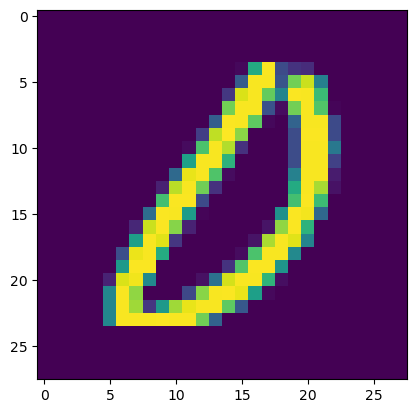

In [137]:
plt.imshow(X_train[res0[0]])

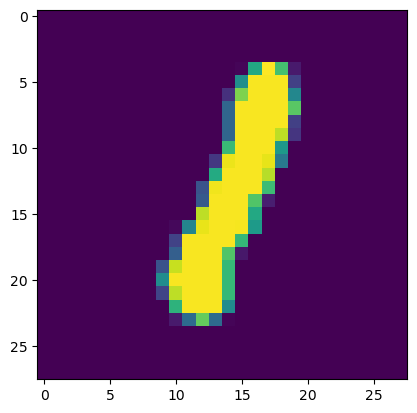

In [138]:
plt.imshow(X_train[res1[0]])

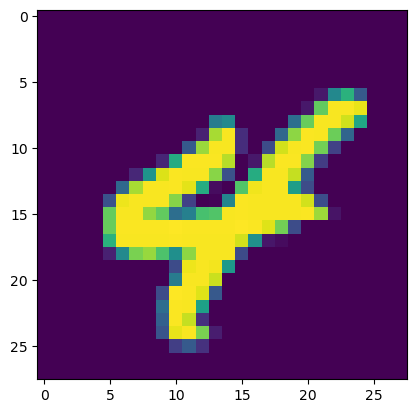

In [139]:
plt.imshow(X_train[res4[0]])

# Storing the index of the images

* function : storingIndexes
* parameters : passing list containing indices of the image 0,1,2,3,4
* return : values corresponding to those indices(image)

In [140]:

def storingIndexes(res0,res1,res4):
    result0 = []
    result1 = []
    result4 = []
    
    for index in res0:
        result0.append(resultsAvg[index])
    
    for index in res1:
        result1.append(resultsAvg[index])
        
    for index in res4:
        result4.append(resultsAvg[index])
    
    return result0,result1,result4
        

In [141]:
def storingResults(res0,res1,res4):
    result0 = []
    result1 = []
    result4 = []
    
    for index in res0:
        result0.append(results[index])
    
    for index in res1:
        result1.append(results[index])
        
    for index in res4:
        result4.append(results[index])
    
    return result0,result1,result4

In [142]:
result0 , result1 , result4 =storingIndexes(res0,res1,res4)
#result0 , result1 , result4 =storingResults(res0,res1,res4)

In [143]:
result0 = [np.squeeze(arr) for arr in result0]
result1 = [np.squeeze(arr) for arr in result1]
result4 = [np.squeeze(arr) for arr in result4]
#result0

In [144]:
def plotResults(res):
    plt.plot(res)
    plt.ylim(0,1)
    plt.show()

In [145]:
result0[1]

1075.837039275946

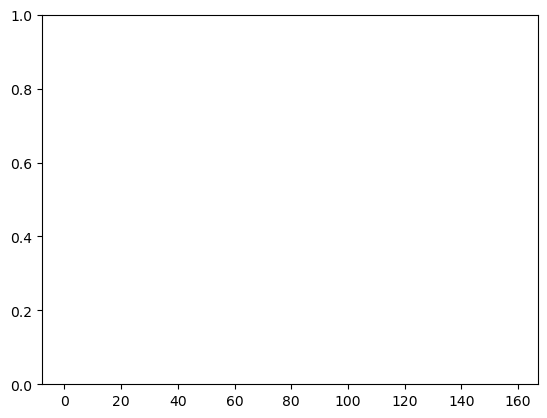

In [146]:
plotResults(result0)

(array([ 1.,  1.,  0.,  0.,  2.,  2.,  1.,  1.,  4.,  2.,  5.,  2.,  5.,
         5.,  6.,  5.,  2., 11.,  5.,  6.,  8.,  1.,  5., 10.,  7.,  9.,
         4.,  3.,  8.,  3.,  6.,  2.,  3.,  3.,  4.,  3.,  1.,  2.,  1.,
         3.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([ 321.16811744,  347.64082173,  374.11352603,  400.58623033,
         427.05893462,  453.53163892,  480.00434322,  506.47704751,
         532.94975181,  559.42245611,  585.8951604 ,  612.3678647 ,
         638.840569  ,  665.31327329,  691.78597759,  718.25868189,
         744.73138618,  771.20409048,  797.67679478,  824.14949907,
         850.62220337,  877.09490767,  903.56761196,  930.04031626,
         956.51302056,  982.98572485, 1009.45842915, 1035.93113345,
        1062.40383774, 1088.87654204, 1115.34924634, 1141.82195063,
        1168.29465493, 1194.76735923, 1221.24006352, 1247.71276782,
        1274.18547212, 1300.65817641, 1327.13088071, 1353.60358501,
        1380.0762893 , 1406.5489936 

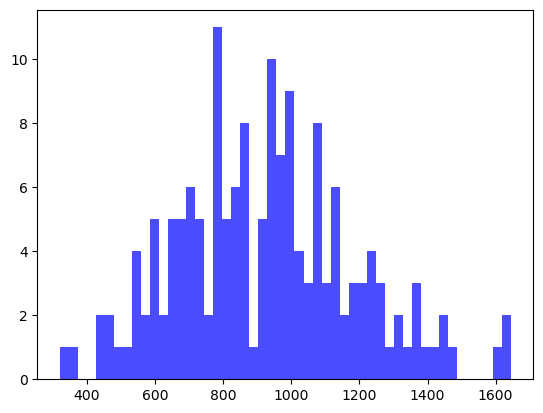

In [147]:
plt.hist(result0, bins=50, color='blue', alpha=0.7) 

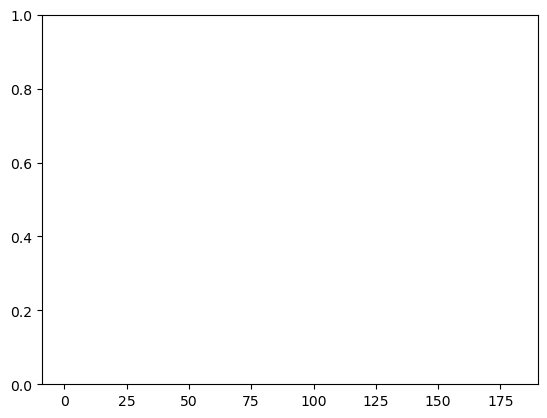

In [148]:
plotResults(result1)

(array([ 3.,  1.,  0.,  1.,  5.,  1.,  9.,  6.,  8., 11.,  7., 10.,  8.,
         9.,  5.,  7.,  8.,  4., 10.,  5.,  7.,  7.,  9., 10.,  3.,  2.,
         8.,  2.,  3.,  0.,  3.,  1.,  0.,  2.,  1.,  0.,  1.,  1.,  1.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([170.92239711, 184.02422473, 197.12605235, 210.22787997,
        223.3297076 , 236.43153522, 249.53336284, 262.63519046,
        275.73701808, 288.8388457 , 301.94067333, 315.04250095,
        328.14432857, 341.24615619, 354.34798381, 367.44981143,
        380.55163905, 393.65346668, 406.7552943 , 419.85712192,
        432.95894954, 446.06077716, 459.16260478, 472.26443241,
        485.36626003, 498.46808765, 511.56991527, 524.67174289,
        537.77357051, 550.87539814, 563.97722576, 577.07905338,
        590.180881  , 603.28270862, 616.38453624, 629.48636386,
        642.58819149, 655.69001911, 668.79184673, 681.89367435,
        694.99550197, 708.09732959, 721.19915722, 734.30098484,
        747.

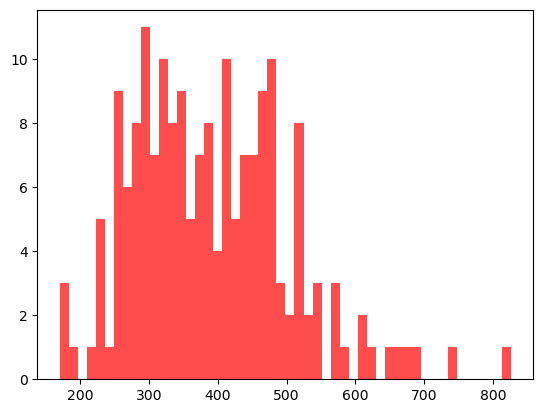

In [149]:
plt.hist(result1, bins=50, color='red', alpha=0.7) 

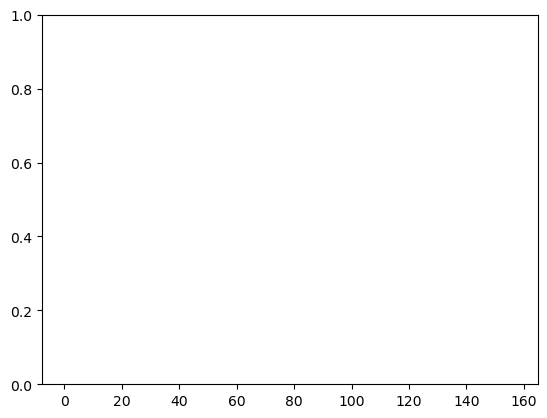

In [150]:
plotResults(result4)

(array([ 1.,  1.,  0.,  3.,  1.,  3.,  2.,  0.,  3.,  6.,  6.,  7.,  7.,
         7., 12.,  6.,  6.,  6.,  9.,  7.,  7.,  5.,  5.,  5.,  3.,  3.,
         3.,  3.,  4.,  5.,  5.,  1.,  5.,  2.,  1.,  4.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 283.05709139,  300.82697564,  318.5968599 ,  336.36674416,
         354.13662841,  371.90651267,  389.67639692,  407.44628118,
         425.21616543,  442.98604969,  460.75593395,  478.5258182 ,
         496.29570246,  514.06558671,  531.83547097,  549.60535523,
         567.37523948,  585.14512374,  602.91500799,  620.68489225,
         638.4547765 ,  656.22466076,  673.99454502,  691.76442927,
         709.53431353,  727.30419778,  745.07408204,  762.8439663 ,
         780.61385055,  798.38373481,  816.15361906,  833.92350332,
         851.69338758,  869.46327183,  887.23315609,  905.00304034,
         922.7729246 ,  940.54280885,  958.31269311,  976.08257737,
         993.85246162, 1011.62234588

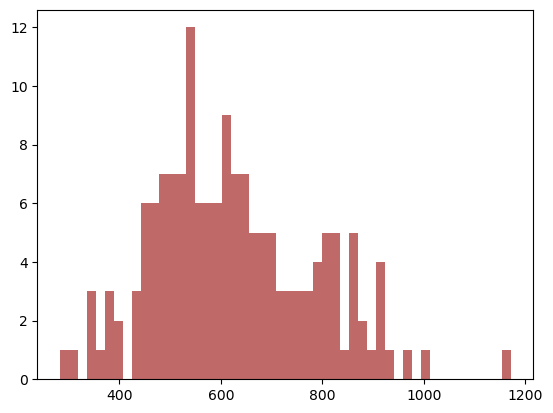

In [151]:
plt.hist(result4, bins=50, color='brown', alpha=0.7) 

In [152]:
def calculateResult(data,finalWeight):
        predict = []
        for item in data:
            item = flattenInput(item)
            res = np.dot(item.T,finalWeight)
            #res = np.median(res)
            predict.append(res)
        return predict

In [153]:
def calculateResultExtraLayer(data,weight1,weight2):
        predict = []
        for item in data:
            item = flattenInput(item)
            out1 = np.dot(item.T,weight1)
            out2 = np.dot(out1,weight2)
            res = np.median(out2)
            predict.append(res)
        return predict

In [154]:
from scipy.stats import norm

In [155]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    accuracy = 0
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
            accuracy = correct_predictions/len(y_true)
    return accuracy*100

In [156]:
#Calculate the probability densities under each distribution
result = calculateResultExtraLayer(X_train,weight1,weight2)
prediction = []
for value in result:
    pdf1 = norm.pdf(value, loc=np.mean(result0), scale=np.std(result0))
    pdf2 = norm.pdf(value, loc=np.mean(result1), scale=np.std(result1))
    pdf3 = norm.pdf(value, loc=np.mean(result4), scale=np.std(result4))

# Determine which distribution the value most likely belongs to
    if pdf1 > pdf2 and pdf1 > pdf3:
        prediction.append(0)
    elif pdf2 > pdf1 and pdf2 > pdf3:
        prediction.append(1)
    else:
        prediction.append(4)

In [157]:
# result = calculateResultExtraLayer(X_test,weight1,weight2)
# prediction = []
# for value in result:
        
#     log_likelihood_result0 = np.sum(norm.logpdf(value, loc=np.mean(result0), scale=np.std(result0)))
#     log_likelihood_result1 = np.sum(norm.logpdf(value, loc=np.mean(result1), scale=np.std(result1)))
#     log_likelihood_result4 = np.sum(norm.logpdf(value, loc=np.mean(result4), scale=np.std(result4)))

# # Determine which distribution the entire value array most closely belongs to
#     if log_likelihood_result0 > log_likelihood_result1 and log_likelihood_result0 > log_likelihood_result4:
#         prediction.append(0)
#     elif log_likelihood_result1 > log_likelihood_result0 and log_likelihood_result1 > log_likelihood_result4:
#          prediction.append(1)
#     else:
#          prediction.append(4)

In [158]:
#len(pdf1_list)

In [159]:
#prediction

In [160]:
accuracy = compute_accuracy(Y_train,prediction)

In [161]:
accuracy

71.0

In [306]:
#*************************************************
# random ---> median ---> 69.8 ----> 3
# normalize ----> median ---> 44.04 ---->3
# random ---> mean ---> 69.7 -----> 3
# normalize ---> median ---> 63.254 --->10
# random -----> median ----> 68.2 ----> 10

# Above observation for output neuon equals 20
#*************************************************
# random -----> median ----> 67.06 ----> 10
# random -----> mean -----> 65.87 ---->10
# normalize ---> mean -----> 55.92 ----> 10
# normalize --->median -----> 48.01 ---->10

# Above observation for output neuon equals 3
#*************************************************
# normalize ----> median -----> 76.5 ----> 10 --> 1st time
# normalize ----> median -----> 71.68 ----> 10 --> 2nd Time
#*************************************************
# normalize ----> median ----->69.03 ----> 10 ----->weightThresholding after epoch ---> 0.9(Threshold),0.1(Leaking)
# normalize ----> median ----->68.4 ----> 10 ----->weightThresholding after epoch ---> 0.9(Threshold),0.1(Leaking), removed out threshold

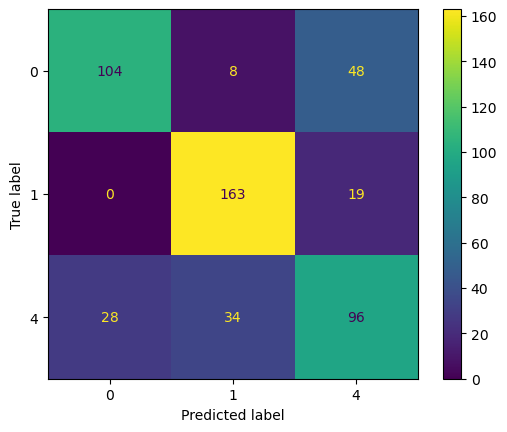

In [307]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(Y_train,prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1 ,4])

cm_display.plot()
plt.show()

In [634]:
np.min(result0)

51.749269951109625

In [229]:
np.max(result0)

9069.743417341037

* Returns min and max value in a list

In [230]:
def MaxMinResult(res):
    return np.min(res) , np.max(res)

In [233]:
min0 , max0 = MaxMinResult(result0)
min1 , max1 = MaxMinResult(result1)
min4 , max4 = MaxMinResult(result4)

In [234]:
print(min0)
print(max0)

820.6168923161749
9069.743417341037


In [235]:
print(min1)
print(max1)

124.88702314462651
4035.114572155578


In [236]:
print(min4)
print(max4)

358.7676893895287
7342.2584121915625


In [237]:
max_value = np.max(result0)
index = result0.index(max_value)
print(index)


4077


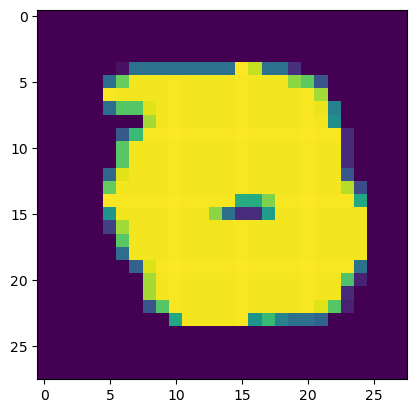

In [238]:
plt.imshow(X_train[res0[4077]])

In [239]:
max_value = np.min(result0)
index = result0.index(max_value)
print(index)


3707


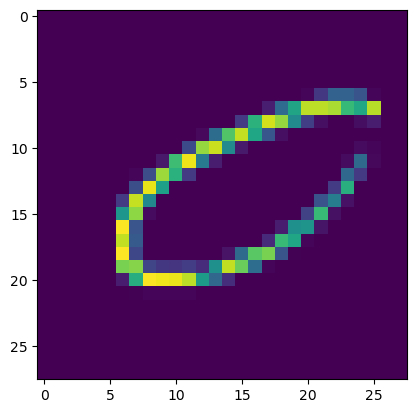

In [240]:
plt.imshow(X_train[res0[3525]])

In [241]:
np.mean(np.dot(testFlatten[0].T,finalWeight))

300.2028669737775

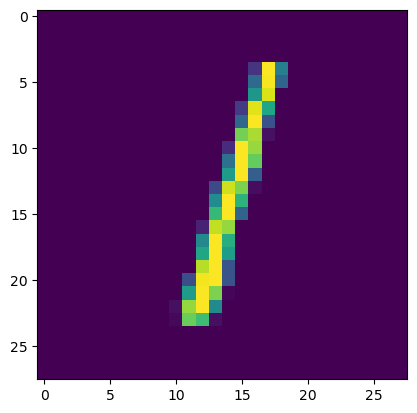

In [242]:
plt.imshow(X_test[0])

In [243]:
np.mean(np.dot(testFlatten[3].T,finalWeight))

420.13239328502254

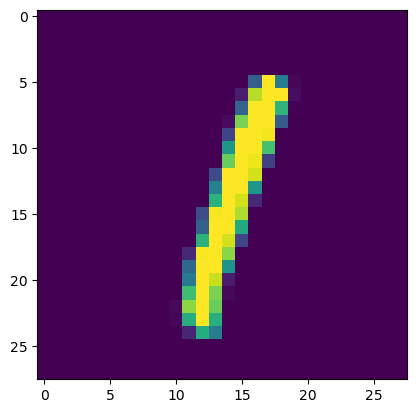

In [244]:
plt.imshow(X_test[3])

# Problem

1. Proper Encoding of the MNIST Data is required
2. Check the algorithm for previous data
    - The weight values are increasing
3. Thresholding on weights
4. If weights are increasing then the output will be increasing , we have to work on the the weight clipping.
5. Epochs 10
6. Digits 0-5 (20 output neurons)

In [245]:
def weightUpdate(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                input_ = manipulatingTheArray(input_)
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    #manipulatedinput = manipulatingTheArray(input_)
                    weight = weight + np.dot(input_, out)
                print(out)
            

In [246]:
weightUpdate(1,1,X_train,weights)

NameError: name 'thresholding' is not defined

# Experimenting with the Weight Update Function 

1. Without Thresholding

In [77]:
def weightUpdateNoThresholding(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    mInput = manipulatingTheArray(input_)
                    weight = weight + np.dot(mInput, out)
                print(out)
    
    #return weight

In [80]:
#weightUpdateNoThresholding(1,10,X_train,weights)

2. No Input Manipulation

In [81]:
def weightUpdateNoInputManipulation(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [83]:
finalWeights = weightUpdateNoInputManipulation(1,10,X_train,weights)

In [85]:
printResults(X_train,finalWeights)

[array([[9952981.9776312 , 9952983.78771774, 9952980.22546172,
         9952984.17954997, 9952979.62129831, 9952983.39618329,
         9952984.12277677, 9952978.30823085, 9952977.73184416,
         9952980.29404787, 9952981.81693666, 9952978.96837344,
         9952982.51001832, 9952984.30400523, 9952986.40933317,
         9952980.39956972, 9952981.34806903, 9952978.70548629,
         9952983.84226781, 9952980.82762274]]),
 array([[4411007.2184424 , 4411010.05153546, 4411008.07675292,
         4411007.48091497, 4411005.18366287, 4411007.69902311,
         4411008.45580176, 4411005.91641389, 4411009.47492531,
         4411012.58481127, 4411007.2804175 , 4411008.07541623,
         4411008.01839292, 4411010.98324115, 4411010.77982822,
         4411009.52036677, 4411013.13197226, 4411008.80886294,
         4411007.73641599, 4411004.83176408]]),
 array([[6388741.87790482, 6388748.81913613, 6388745.38822244,
         6388746.8537067 , 6388741.0350559 , 6388747.00410496,
         6388742.58585

3. Do combined Iteration for every image

In [86]:
def weightUpdateCombinedIterationForEveryImage(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
        for iteration_ in range(iteration):
            for input_ in flattenImage:
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [88]:
finalWeights = weightUpdateCombinedIterationForEveryImage(1,100,X_train,weights)

In [594]:
#printResults(X_train,finalWeights)

4. Changing the input to 0 to -1

In [595]:
def weightUpdateCombinedIterationForEveryImage(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
        for iteration_ in range(iteration):
            for input_ in flattenImage:
                    input_ = manipulatingTheArray(input_)
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [596]:
finalWeight = weightUpdateCombinedIterationForEveryImage(3,10,X_train,weights)

NameError: name 'thresholding' is not defined

In [597]:
for item in inputImage:
    item = flattenInput(item)
    item = manipulatingTheArray(item)
    print(np.dot(item.T,finalWeight))

NameError: name 'inputImage' is not defined

In [57]:
finalWeight

array([[ 69.39000612,  68.04254974,  69.43624434,  69.21410972],
       [ 27.32086988,  27.73503806,  27.14569411,  27.62237861],
       [ 69.59175721,  67.63236573,  69.84716618,  69.13499989],
       [-26.91268329, -26.00519731, -26.88039291, -26.61352704],
       [ 27.07747724,  27.15349475,  27.58290186,  27.71552529],
       [ 21.88294213,  19.82698269,  21.19890101,  21.59518935],
       [-26.19324792, -25.02202828, -26.97153446, -26.72172794],
       [-20.80487026, -19.01843236, -20.95428235, -20.61819169],
       [ 69.94875543,  67.68330195,  69.2727027 ,  69.93041008]])